# Regressão Polinomial

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def best_poly(x, y, k=1):
    n = len(x)
    A = np.zeros((k + 1, k + 1), dtype=float)
    B = []
    somas = {i: sum(xi**i for xi in x) for i in range(1, 2 * k + 1)}
    for i in range(k + 1):
        for j in range(k + 1):
            if i == 0 and j == 0:
                A[0][0] = n
            else:
                A[i][j] = somas[i + j]
        if i == 0:
            B.append(sum(y))
        else:
            B.append(sum(yi * xi ** i for xi, yi in zip(x, y)))
    return np.linalg.solve(A, B)

## Criando Modelos de Exemplos

In [4]:
def model(x):
    a, b = -2, 2
    erro = a + (b - a) * np.random.random()
    A, B, C, D = 0.36, 1.52, -2.123, 4.123
    return A * x ** 3 + B * x ** 2 + C * x + D + erro

In [5]:
x = np.linspace(-6, 3, 200)
y = [model(xi) for xi in x]

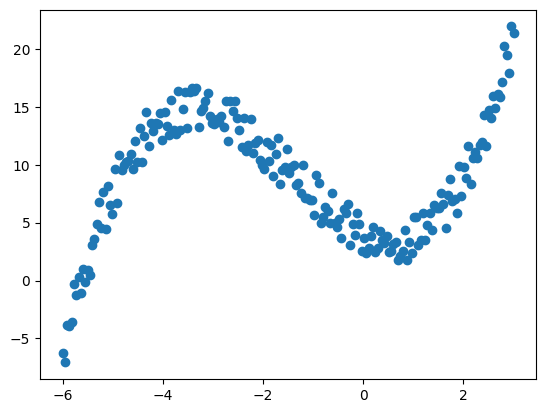

In [6]:
plt.scatter(x, y)

In [7]:
coeffs = best_poly(x, y, k=3)

In [8]:
coeffs

array([ 3.91530959, -2.13073354,  1.55366945,  0.3654906 ])

In [9]:
def build_best_poly(coeffs):
    def poly(x):
        soma = coeffs[0]
        for i, ai in enumerate(coeffs[1:], 1):
            soma += ai * x ** i
        return soma
    return poly

In [10]:
p = build_best_poly(coeffs)

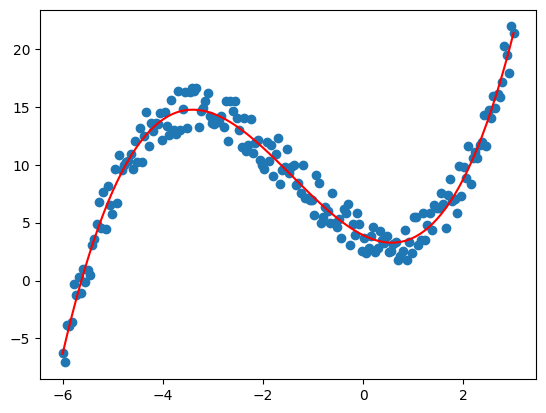

In [11]:
t = np.linspace(min(x), max(x), 200)
pt = [p(ti) for ti in t]
plt.scatter(x, y)
plt.plot(t, pt, color='red')

# Regressão Exponencial

In [12]:
# A melhor função do tipo y = a * exp(b * x)
def best_exp(x, y):
    Y = [np.log(yi) for yi in y]
    a0, a1 = best_poly(x, Y, k=1)
    return np.exp(a0), a1

In [13]:
def model_exp(x):
    a, b = 0, 2
    erro = a + (b - a) * np.random.random()
    return 1.24123 * np.exp(1.023424 * x) + erro

In [14]:
x = np.linspace(0, 3, 100)
y = [model_exp(xi) for xi in x]
a, b = best_exp(x, y)
e = lambda x: a * np.exp(b * x)

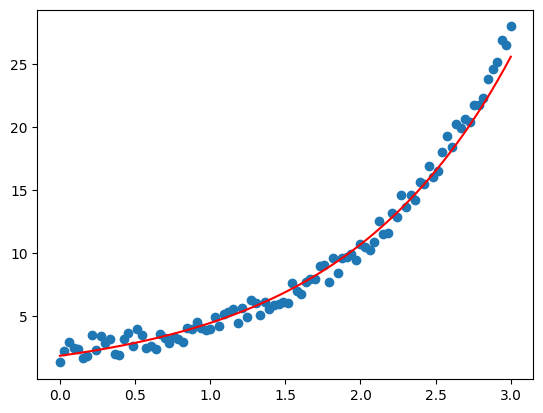

In [15]:
plt.scatter(x, y)
t = np.linspace(min(x), max(x), 200)
et = e(t)
plt.plot(t, et, color="red")

# Regressão Exponencial + Translação

In [16]:
def model_exp_2(x):
    a, b = -10, -8
    erro = a + (b - a) * np.random.random()
    return 1.24123 * np.exp(1.023424 * x) + erro

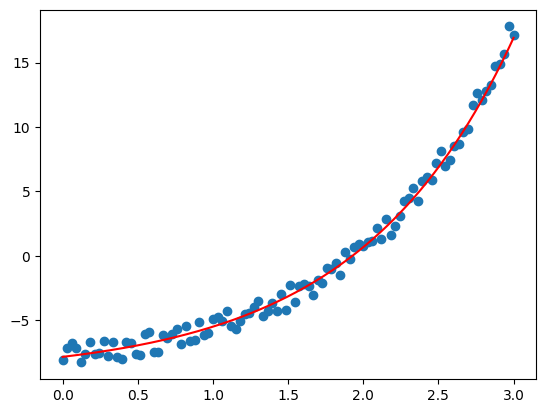

In [17]:
x = np.linspace(0, 3, 100)
y = [model_exp_2(xi) for xi in x]

# plotando
plt.scatter(x, y)

# translação vertical
k = abs(min(y)) + 1
y_up = [yi + k for yi in y]

# a lista de pontos (x[i], y_up[i]), tem todas as 
# coordenadas y positivas
a, b = best_exp(x, y_up)
e = lambda x: a * np.exp(b * x) - k

# plotando o gráfico da exponencial
t = np.linspace(min(x), max(x), 200)
et = [e(ti) for ti in t]
plt.plot(t, et, color="red")

# Ajuste de Potências

In [18]:
# encontrar a melhor função y = a * x ** b
def best_pow(x, y):
    x_ = np.log(x)
    y_ = np.log(y)
    a0, a1 = best_poly(x_, y_,k=1)
    a = np.exp(a0)
    b = a1
    return a, b

In [22]:
def model_pow(x):
    a = 1.52342
    b = 2.78238
    low, high = 1, 1.1
    erro = low + (high - low) * np.random.random()
    return a * x ** b + erro

a = 2.13387030499381 e b = 2.536757247822408


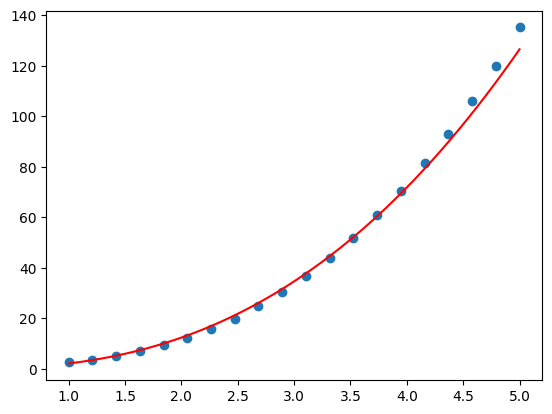

In [23]:
x = np.linspace(1, 5, 20)
y = [model_pow(xi) for xi in x]

# plotando os pontos
plt.scatter(x, y)

# encontrando a e b
a, b = best_pow(x, y)
print(f"{a = } e {b = }")

# construindo a função potência
def p(x):
    return a * x ** b

# plotando a função potência
t = np.linspace(min(x), max(x), 200)
pt = p(t)
plt.plot(t, pt, color="red")

# Ajuste de Potências: y negativos

In [57]:
def model_pow(x):
    a = 0.52342
    b = 2.78238
    low, high = -16, -10
    erro = low + (high - low) * np.random.random()
    return a * x ** b + erro

a = 4.024648730666238
b = 2.099594109838411
k = 3.57404370027554


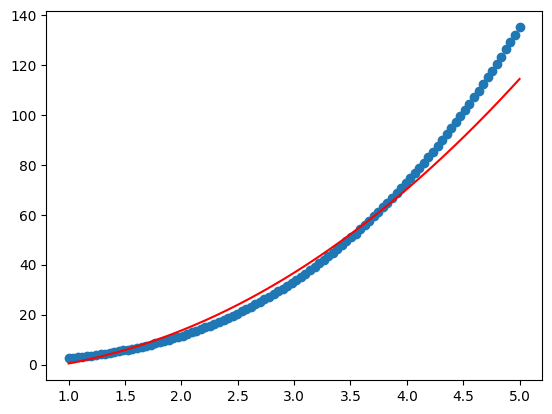

In [25]:
x = np.linspace(1, 5, 100)
y = [model_pow(xi) for xi in x]

# plotando pontos
plt.scatter(x, y)

# translação para cima
k = abs(min(y)) + 1
y_up = [yi + k for yi in y]

# encontrar a melhor função potência
a, b = best_pow(x, y_up)
print(f"{a = }\n{b = }\n{k = }")

def p(x):
    return a * x ** b - k

# plotar a função potência
t = np.linspace(min(x), max(x), 200)
pt = p(t)
plt.plot(t, pt, color="red")

# Ajuste de Potências: x negativos

a = 54.58421865073412
b = -2.021201494727808
k = 5.0


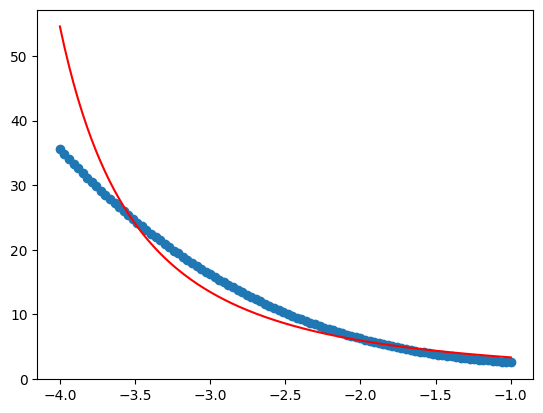

In [70]:
def model_pow(x):
    a = -0.52342
    b = 3
    low, high = 2, 2.1
    erro = low + (high - low) * np.random.random()
    return a * x ** b + erro

x = np.linspace(-4, -1, 100)
y = [model_pow(xi) for xi in x]

# plotando pontos
plt.scatter(x, y)

# translação para a direita
k = abs(min(x)) + 1
x_right = [xi + k for xi in x]

# encontrar a melhor função potência
a, b = best_pow(x_right, y)
print(f"{a = }\n{b = }\n{k = }")

def p(x):
    return a * (x + k) ** b

# plotar a função potência
t = np.linspace(min(x), max(x), 200)
pt = p(t)
plt.plot(t, pt, color="red")